# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 12 - przekształcenia geometryczne






### Zadanie 1

1) Utwórz macierz współrzędnych punktów reprezentującą figurę geometryczną, składającą się z co najmniej 4 punktów. Figura powinna mieć "punkt centralny" znajdujący się (w przybliżeniu, nie musi być dokładnie) w punkcie `(0, 0)`.

2) Wyświetl utworzoną figurę na wykresie za pomocą biblioteki `matplotlib`. Upewnij się, że wykres jest czytelny (np. dodaj kolor wypełnienia figury i oznaczenia osi).

> Podpowiedź: możesz użyć funkcji [`plt.fill`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.fill.html)

Kolejne zadania wykonuj, używając macierzy utworzonej w tym zadaniu, chyba że w treści zadania wskazano inaczej.


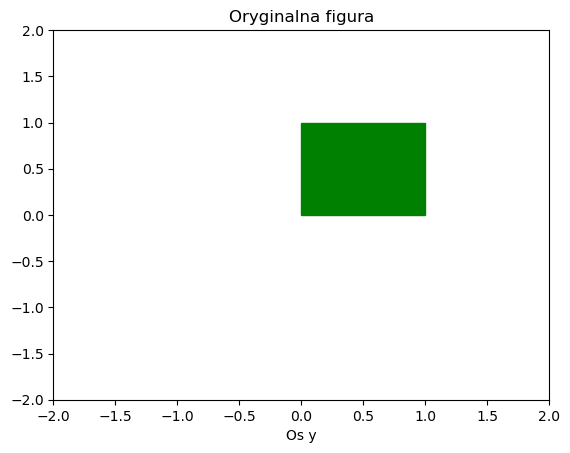

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation


anchors = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])

plt.fill(anchors[:,0], anchors[:,1], color='green')
plt.xlabel("Os x")
plt.xlabel("Os y")
plt.title("Oryginalna figura")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

### Zadanie 2

Aby wykonać przekształcenie należy pomnożyć _macierz przekształcaną_ przez _macierz przekształcenia_. Poniżej wymienione są przykładowe macierze przekształceń pozwalające wykonać tranformacje:


Obrót o kąt $\theta$:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta\\
\text{sin}\theta & \text{cos}\theta
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0x$:

$$
A_k = \begin{pmatrix}
k & 0\\
0 & 1
\end{pmatrix}
$$

Rozciągnięcie wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}
$$

Rozciągnięcie w proporcji $k_x$ wzdłuż osi $0x$ i w proporcji $k_y$ wzdłuż osi $0y$:

$$
A_k = \begin{pmatrix}
k_x & 0\\
0 & k_y
\end{pmatrix}
$$

Pochylenie względem osi $0y$:

$$
A_k = \begin{pmatrix}
1 & k\\
0 & 1
\end{pmatrix}
$$

Pochylenie względem osi $0x$:

$$
A_k = \begin{pmatrix}
1 & 0\\
k & 1
\end{pmatrix}
$$



**Polecenie**

Utwórz trzy animacje dla obrotu, rozciągnięcia i pochylenia (odpowiednio).


Przykład:

<div style="display: flex; flex-direction: row; flex-wrap: wrap; justify-content: center; width:100%;">
<img src="./Figure_2_rot.gif" height="300" width="300" />
<img src="./Figure_2_strech.gif" height="300" width="300" />
<img src="./Figure_2_shear.gif" height="300" width="300" />
</div>


Przykład tworzenia animacji:

```python
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots(figsize=(8,8))

X = [1, 2, 3, 4]

def animate(i):
    ax.clear()
    ax.set_title(f'{i=}')
    ax.set_xlim(0,5)
    ax.set_ylim(1,10**16)
    ax.set_yscale('log')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.bar(X, [X[0]+i, X[1]*i, X[2]**i, i**X[3]] )

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True) 
ani.save('tmp.gif', writer='imagemagick', fps=100)
```

<>:27: SyntaxWarning: invalid escape sequence '\O'
<>:27: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3688\635469861.py:27: SyntaxWarning: invalid escape sequence '\O'
  ani.save('Own_gifs\Own_rotation.gif', writer='imagemagick', fps=100)
MovieWriter imagemagick unavailable; using Pillow instead.


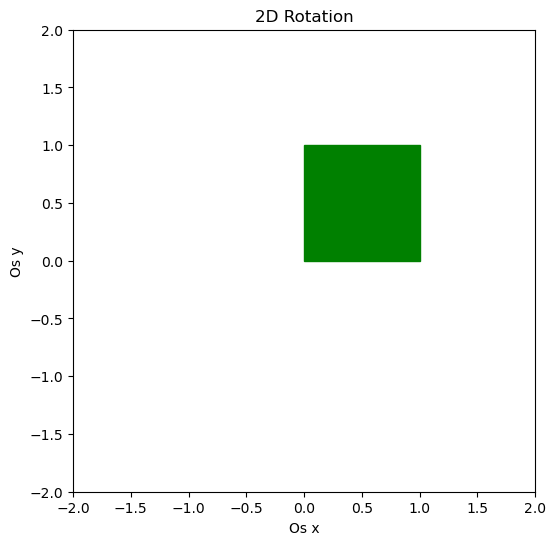

In [2]:
#Rotation
def rotate(X, angle):
    rot = np.array([
        [math.cos(angle), -math.sin(angle)],
        [math.sin(angle),  math.cos(angle)]
    ])
    return X @ rot

fig, ax = plt.subplots(figsize=(6, 6))


def animate(i):
    ax.clear()
    angle = 2 * math.pi * i / 36
    rotated = rotate(anchors, angle)
    ax.fill(rotated[:, 0], rotated[:, 1], color='green')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_xlabel('Os x')
    ax.set_ylabel('Os y')
    ax.set_title('2D Rotation')


#Animation
ani = animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True)
ani.save('Own_gifs\Own_rotation.gif', writer='imagemagick', fps=100)

<>:27: SyntaxWarning: invalid escape sequence '\O'
<>:27: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3688\3339419349.py:27: SyntaxWarning: invalid escape sequence '\O'
  ani.save('Own_gifs\Own_scale.gif', writer='imagemagick', fps=100)
MovieWriter imagemagick unavailable; using Pillow instead.


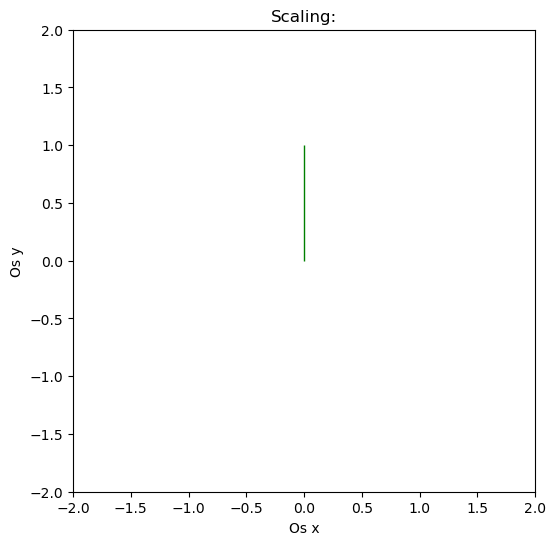

In [3]:
#Skalowanie
def scale(X, value):
    scale = np.array([
        [value, 0],
        [0, 1]
    ])
    return X @ scale

fig, ax = plt.subplots(figsize=(6, 6))


def animate(i):
    ax.clear()
    value = i/36
    rotated = scale(anchors, value)
    ax.fill(rotated[:, 0], rotated[:, 1], color='green')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_xlabel('Os x')
    ax.set_ylabel('Os y')
    ax.set_title(f'Scaling:')


#Animation
ani = animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True)
ani.save('Own_gifs\Own_scale.gif', writer='imagemagick', fps=100)

<>:27: SyntaxWarning: invalid escape sequence '\O'
<>:27: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3688\1232282569.py:27: SyntaxWarning: invalid escape sequence '\O'
  ani.save('Own_gifs\Own_slope.gif', writer='imagemagick', fps=100)
MovieWriter imagemagick unavailable; using Pillow instead.


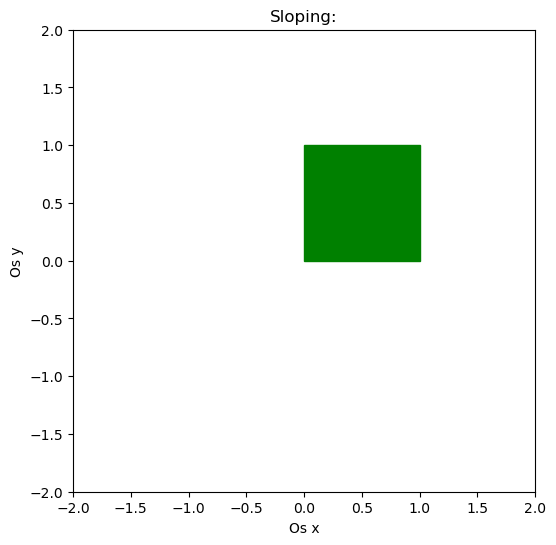

In [4]:
#Pochylenie
def slope(X, value):
    slope = np.array([
        [1, 0],
        [value, 1]
    ])
    return X @ slope

fig, ax = plt.subplots(figsize=(6, 6))


def animate(i):
    ax.clear()
    value = i/36
    rotated = slope(anchors, value)
    ax.fill(rotated[:, 0], rotated[:, 1], color='green')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_xlabel('Os x')
    ax.set_ylabel('Os y')
    ax.set_title(f'Sloping:')


#Animation
ani = animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True)
ani.save('Own_gifs\Own_slope.gif', writer='imagemagick', fps=100)

### Zadanie 3 (przekształcenia afiniczne)

Przekształcenia afiniczne pozwalają na wykonywanie operacji _translacji_ i łączenia jej z innymi operacjami przekształcenia. 
Aby wykonać przekształcenie afiniczne należy zmienić reprezentację punktu $(x, y) \in R^2$ na $(x, y, 1) \in R^3$. W ten sposób macierz przekształceń osiąga wymiar 3x3. Macierz pozwalająca wykonanie operacji translacji (przesunięcie o wektor $[k_x, k_y]$) wygląda wtedy następująco:



$$
A_k = \begin{pmatrix}
1 & 0 & k_x \\
0 & 1 & k_y \\
0 & 0 & 1
\end{pmatrix}
$$


Pozostałe operacje analogicznie jak wcześniej, np. operacja obrotu:

$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Polecenie**

Wykonaj animację, gdzie operacja translacji oraz obrotu są wykonywane za pomocą jednej operacji macierzowej.

> Podpowiedź: należy "połączyć" macierze przekształceń w jedną.


Przykład:

<img src="./Figure_3.gif" height="300" width="300" />

<>:33: SyntaxWarning: invalid escape sequence '\O'
<>:33: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3688\744617908.py:33: SyntaxWarning: invalid escape sequence '\O'
  ani.save('Own_gifs\Own_trans_rot.gif', writer='imagemagick', fps=100)
MovieWriter imagemagick unavailable; using Pillow instead.


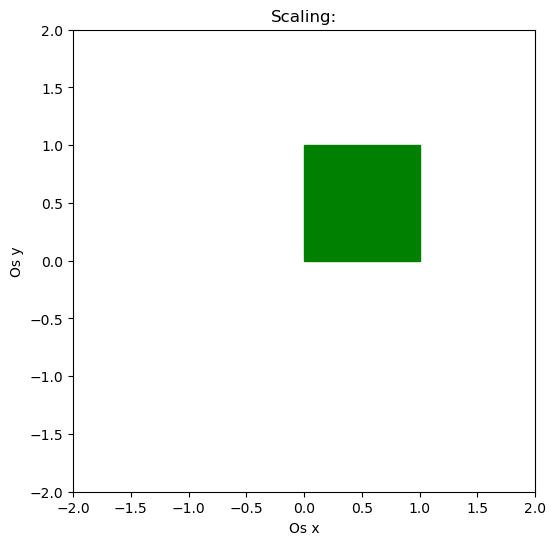

In [5]:
anchors = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
anchors = np.hstack([anchors, np.ones((anchors.shape[0], 1))])

def trans_rotate(X, value):
    x_transl = value / 36
    y_transl = 3 * value / 36
    angle = 2 * math.pi * value / 36
    
    homgen = np.array([[math.cos(angle), - math.sin(angle), x_transl],
                       [math.sin(angle), math.cos(angle), y_transl],
                       [0,0,1]
        ])
    
    return X @ homgen.T

fig, ax = plt.subplots(figsize=(6, 6))


def animate(i):
    ax.clear()
    rotated = trans_rotate(anchors, i)
    ax.fill(rotated[:, 0], rotated[:, 1], color='green')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_xlabel('Os x')
    ax.set_ylabel('Os y')
    ax.set_title(f'Scaling:')


#Animation
ani = animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True)
ani.save('Own_gifs\Own_trans_rot.gif', writer='imagemagick', fps=100)

### Zadanie 4 (przekształcenia macierzowe w 3D)

1) Utwórz prostą figurę geometryczną złożoną z 8 punktów w przestrzeni 3D (podobnie jak w pierwszym zadaniu).

Przykład:

```python
fig = plt.figure()
ax = Axes3D(fig)

m = np.array([
    [-1, -1, -1],
    [-1, 2, -1],
    [2, -1, -1],
    [2, 2, -1],
    [-1, -1, 2],
    [-1, 2, 2],
    [2, -1, 2],
    [2, 2, 2]
])

ax.scatter(m[:, 0], m[:, 1], m[:, 2])
```

2) Utwórz animację obrotu figury względem osi $0z$.

> Aby wykonać taki obrót należy użyć poniższej macierzy przekształceń:
$$
A_\theta = \begin{pmatrix}
\text{cos}\theta & -\text{sin}\theta & 0\\
\text{sin}\theta & \text{cos}\theta & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

**Przykład**


<img src="./Figure_4.gif" height="300" width="300" />

<>:43: SyntaxWarning: invalid escape sequence '\O'
<>:43: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3688\2297121217.py:43: SyntaxWarning: invalid escape sequence '\O'
  ani.save('Own_gifs\Own_rotation_3D.gif', writer='imagemagick', fps=100)
MovieWriter imagemagick unavailable; using Pillow instead.


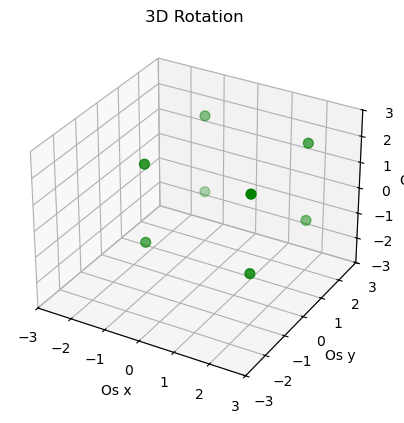

In [6]:
anchors = np.array([
    [-1, -1, -1],
    [-1,  2, -1],
    [ 2, -1, -1],
    [ 2,  2, -1],
    [-1, -1,  2],
    [-1,  2,  2],
    [ 2, -1,  2],
    [ 2,  2,  2]
])



#Rotation
def rotate(X, angle):
    rot = np.array([
        [math.cos(angle), -math.sin(angle), 0],
        [math.sin(angle),  math.cos(angle), 0],
        [0,0,1]
    ])
    return X @ rot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def animate(i):
    ax.clear()
    angle = 2 * math.pi * i / 36
    rotated = rotate(anchors, angle)
    ax.scatter(rotated[:, 0], rotated[:, 1], rotated[:, 2], color='green', s=50)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-3, 3)
    ax.set_xlabel('Os x')
    ax.set_ylabel('Os y')
    ax.set_zlabel('Os z')
    ax.set_title('3D Rotation')


#Animation
ani = animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True)
ani.save('Own_gifs\Own_rotation_3D.gif', writer='imagemagick', fps=100)

### Zadanie 5

Połącz punkty (jeżeli nie zrobiłeś tego wcześniej) figury z poprzedniego zadania.

<img src="./Figure_5.gif" height="300" width="300" />

<>:57: SyntaxWarning: invalid escape sequence '\O'
<>:57: SyntaxWarning: invalid escape sequence '\O'
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3688\1212383301.py:57: SyntaxWarning: invalid escape sequence '\O'
  ani.save('Own_gifs\Own_rotation_3D_contours.gif', writer='imagemagick', fps=100)
MovieWriter imagemagick unavailable; using Pillow instead.


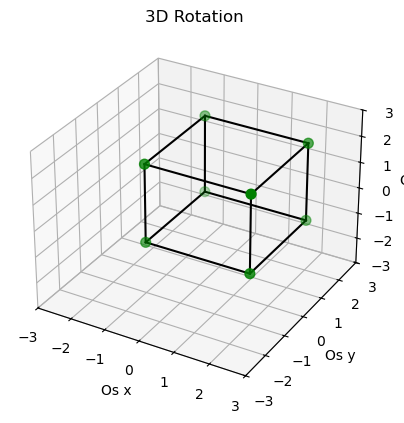

In [7]:
anchors = np.array([
    [-1, -1, -1],
    [-1,  2, -1],
    [ 2, -1, -1],
    [ 2,  2, -1],
    [-1, -1,  2],
    [-1,  2,  2],
    [ 2, -1,  2],
    [ 2,  2,  2]
])


edges = [
    (0,1), (1,3), (3,2), (2,0),  
    (4,5), (5,7), (7,6), (6,4),  
    (0,4), (1,5), (2,6), (3,7)   
]

#Rotation
def rotate(X, angle):
    rot = np.array([
        [math.cos(angle), -math.sin(angle), 0],
        [math.sin(angle),  math.cos(angle), 0],
        [0,0,1]
    ])
    return X @ rot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def animate(i):
    ax.clear()
    angle = 2 * math.pi * i / 36
    rotated = rotate(anchors, angle)
    ax.scatter(rotated[:, 0], rotated[:, 1], rotated[:, 2], color='green', s=50)
    
    #Add edges
    for edge in edges:
        p1 = rotated[edge[0]]
        p2 = rotated[edge[1]]
        xs, ys, zs = zip(p1, p2)
        ax.plot(xs, ys, zs, color='black')
    
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_zlim(-3, 3)
    ax.set_xlabel('Os x')
    ax.set_ylabel('Os y')
    ax.set_zlabel('Os z')
    ax.set_title('3D Rotation')


#Animation
ani = animation.FuncAnimation(fig, animate, frames=36, interval=100, repeat=True)
ani.save('Own_gifs\Own_rotation_3D_contours.gif', writer='imagemagick', fps=100)




